In [1]:
%load_ext autoreload
%autoreload 2

# import os
# os.environ['NUMBA_DISABLE_JIT'] = '1'

In [2]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import run_to_steady_state, get_straub_fig10_data, get_straub_fig10_init
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np
from PySDM.physics.constants import si
import pickle as pkl
import time

In [3]:
(straub_x, straub_log_y) = get_straub_fig10_data()
(straub_x_init, straub_y_init) = get_straub_fig10_init()

Success with run #1
ran Straub2010 for 256 superdroplets in 0.447019100189209 sec


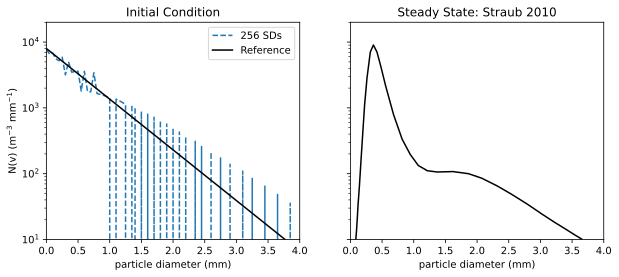

HTML(value="<a href='./straub_fig10.pdf' target='_blank'>./straub_fig10.pdf</a><br>")

In [41]:
run_sims = True
n_sds = [2**8]#, 2**10, 2**12]
steps = [0]#, 7200]
nruns = 1 #5

fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)

# Obtain data
parameterization = 'Straub2010'
for n_sd in n_sds:
    if run_sims:
        t1 = time.time()
        run_to_steady_state(parameterization, n_sd, steps, nruns, dt=2*si.s)
        t2 = time.time()
        print('ran '+parameterization+' for '+str(n_sd)+' superdroplets in '+str(t2 - t1)+' sec')
    data_filename = 'data/steadystate_' + parameterization + '_' + str(n_sd) + 'sd.pkl'
    with open(data_filename, 'rb') as handle:
        (x,y_ensemble,rates) = pkl.load(handle)
    
    # statistics
    y_mean = np.nanmean(y_ensemble, axis=0)
    y_std = np.nanstd(y_ensemble, axis=0)

    # Plotting
    cmap = matplotlib.cm.get_cmap('viridis')
    dr = np.diff(x) * si.um
    dr = np.concatenate([dr, [dr[-1]]])

    legend_entries = []

    color = next(ax[0]._get_lines.prop_cycler)['color']
    for (j, step) in enumerate(steps):  # pylint: disable=protected-access
        if step != 0:
            lbl = str(n_sd) + ' SDs'
            ax[1].plot(2*x/1000,y_mean[j]/dr * si.mm,linestyle='-',color=color,
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
            ax[1].fill_between(2*x/1000, y_mean[j]*dr * si.mm - y_std[j]/2/dr * si.mm, 
                               y_mean[j] * si.mm + y_std[j]/2/dr * si.mm, color=color, alpha=0.2)
        else:
            lbl = str(n_sd) + ' SDs'
            ax[0].plot(2*x/1000,y_mean[j]/2/dr * si.mm,linestyle='--',color=color,
                    label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
            # ax[0].fill_between(2*x/1000, y_mean[j]/2/dr * si.mm - y_std[j]/2/dr * si.mm, 
            #                    y_mean[j]/2/dr * si.mm + y_std[j]/2/dr * si.mm, color=color, alpha=0.2)
            
# Reference data
ax[0].plot(straub_x_init/si.mm, straub_y_init, color='k', label='Reference')
ax[1].plot(straub_x, np.power(10, straub_log_y) ,color='k', label='Reference')

ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xlim([0.0, 4.0])
ax[1].set_xlim([0.0, 4.0])
ax[0].set_ylim([10.0, 2e4])
ax[1].set_ylim([10.0, 2e4])
ax[0].set_xlabel("particle diameter (mm)")
ax[1].set_xlabel("particle diameter (mm)")
ax[0].set_ylabel("N(v) (m$^{-3}$ mm$^{-1})$")
ax[0].legend()
ax[0].set_title("Initial Condition")
ax[1].set_title("Steady State: Straub 2010")
show_plot('straub_fig10.pdf')

In [39]:
y_mean[j]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [26]:
y_std[j]/2/dr * si.mm

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
y_mean[j]/2/dr * si.mm - y_std[j]/2/dr * si.mm, 

(array([7756.76712, 6570.97182, 6846.67404, 5551.10012, 5208.68772,
        5885.46208, 3178.86868, 5023.10284, 3487.09248, 3565.06762,
        3608.50436, 1808.2406 , 3597.17432, 1777.26056, 1754.94476,
        3417.99672, 1650.54798, 1603.38088, 1550.29356, 1491.57868,
        1427.62218,    0.     , 1358.90314, 1285.991  , 1209.53986,
        1130.27988,    0.     , 1049.0054 ,  966.56026,    0.     ,
         883.82014,    0.     ,  801.67258,    0.     ,  720.99528,
           0.     ,  642.63324,    0.     ,  567.37592,    0.     ,
         495.93518,    0.     ,  428.92536,    0.     ,  366.8464 ,
           0.     ,    0.     ,  310.0709 ,    0.     ,  258.83644,
           0.     ,    0.     ,  213.24304,    0.     ,    0.     ,
         173.25664,    0.     ,    0.     ,  138.71812,    0.     ,
           0.     ,    0.     ,  109.35752,    0.     ,    0.     ,
          84.81262,    0.     ,    0.     ,    0.     ,   64.65046,
           0.     ,    0.     ,    0.     ,   48

In [24]:
y_mean[j] * si.mm + y_std[j]/2/dr * si.mm

array([0.38783836, 0.32854859, 0.3423337 , 0.27755501, 0.26043439,
       0.2942731 , 0.15894343, 0.25115514, 0.17435462, 0.17825338,
       0.18042522, 0.09041203, 0.17985872, 0.08886303, 0.08774724,
       0.17089984, 0.0825274 , 0.08016904, 0.07751468, 0.07457893,
       0.07138111, 0.        , 0.06794516, 0.06429955, 0.06047699,
       0.05651399, 0.        , 0.05245027, 0.04832801, 0.        ,
       0.04419101, 0.        , 0.04008363, 0.        , 0.03604976,
       0.        , 0.03213166, 0.        , 0.0283688 , 0.        ,
       0.02479676, 0.        , 0.02144627, 0.        , 0.01834232,
       0.        , 0.        , 0.01550354, 0.        , 0.01294182,
       0.        , 0.        , 0.01066215, 0.        , 0.        ,
       0.00866283, 0.        , 0.        , 0.00693591, 0.        ,
       0.        , 0.        , 0.00546788, 0.        , 0.        ,
       0.00424063, 0.        , 0.        , 0.        , 0.00323252,
       0.        , 0.        , 0.        , 0.00241954, 0.     

In [15]:
y_mean[j]/2/dr * si.mm - y_std[j]/2/dr * si.mm

array([7756.76712, 6570.97182, 6846.67404, 5551.10012, 5208.68772,
       5885.46208, 3178.86868, 5023.10284, 3487.09248, 3565.06762,
       3608.50436, 1808.2406 , 3597.17432, 1777.26056, 1754.94476,
       3417.99672, 1650.54798, 1603.38088, 1550.29356, 1491.57868,
       1427.62218,    0.     , 1358.90314, 1285.991  , 1209.53986,
       1130.27988,    0.     , 1049.0054 ,  966.56026,    0.     ,
        883.82014,    0.     ,  801.67258,    0.     ,  720.99528,
          0.     ,  642.63324,    0.     ,  567.37592,    0.     ,
        495.93518,    0.     ,  428.92536,    0.     ,  366.8464 ,
          0.     ,    0.     ,  310.0709 ,    0.     ,  258.83644,
          0.     ,    0.     ,  213.24304,    0.     ,    0.     ,
        173.25664,    0.     ,    0.     ,  138.71812,    0.     ,
          0.     ,    0.     ,  109.35752,    0.     ,    0.     ,
         84.81262,    0.     ,    0.     ,    0.     ,   64.65046,
          0.     ,    0.     ,    0.     ,   48.39084,    0.  

In [17]:
(y_mean[j]/2/dr * si.mm + y_std[j]/2/dr * si.mm) - (y_mean[j]/2/dr * si.mm - y_std[j]/2/dr * si.mm)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])